## Пятое дз

In [1]:
0.7 ** 5 + 5*0.7**4 * 0.3 + 10*0.7**3 * 0.3**2

0.8369199999999999

Credit scoring problem setup

In [2]:
# Disable warnings in Anaconda
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [4]:
def fill_nan(table):
    for col in table.columns:
        table[col] = table[col].fillna(table[col].median())
    return table

In [5]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"
data = pd.read_csv(DATA_PATH + "credit_scoring_sample.csv", sep=";")
data.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45063 entries, 0 to 45062
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      45063 non-null  int64  
 1   age                                   45063 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  45063 non-null  int64  
 3   DebtRatio                             45063 non-null  float64
 4   NumberOfTimes90DaysLate               45063 non-null  int64  
 5   NumberOfTime60-89DaysPastDueNotWorse  45063 non-null  int64  
 6   MonthlyIncome                         36420 non-null  float64
 7   NumberOfDependents                    43946 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 2.8 MB


Distribution of the target:


0    0.777511
1    0.222489
Name: SeriousDlqin2yrs, dtype: float64

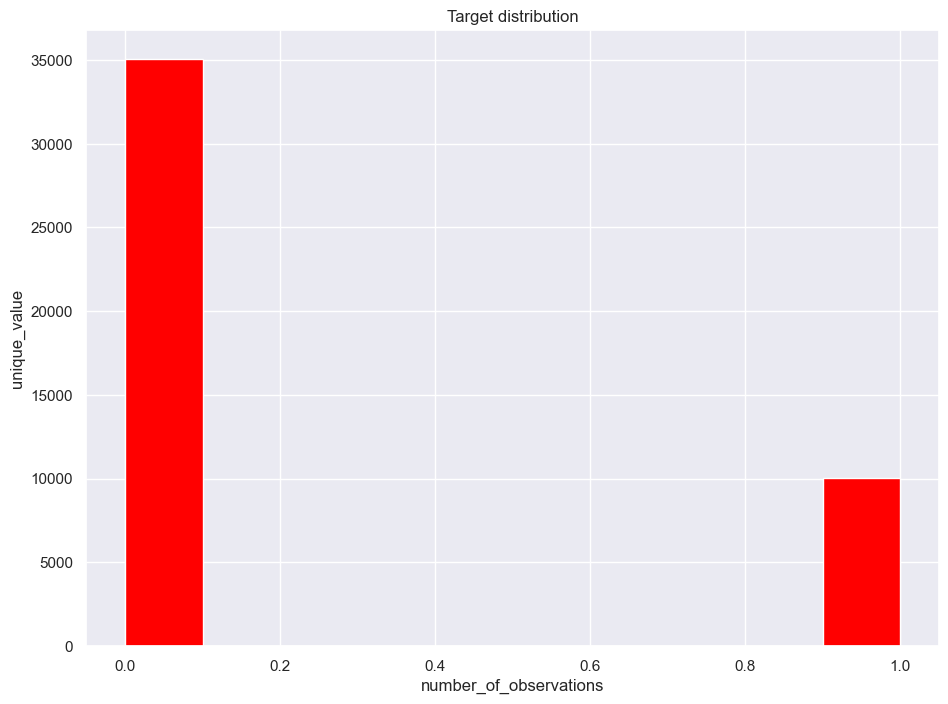

In [8]:
ax = data["SeriousDlqin2yrs"].hist( color="red")
ax.set_xlabel("number_of_observations")
ax.set_ylabel("unique_value")
ax.set_title("Target distribution")

print("Distribution of the target:")
data["SeriousDlqin2yrs"].value_counts() / data.shape[0]

In [9]:
independent_columns_names = [x for x in data if x != "SeriousDlqin2yrs"]
independent_columns_names

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfDependents']

In [10]:
table = fill_nan(data)

In [11]:
X = table[independent_columns_names]
y = table["SeriousDlqin2yrs"]

In [14]:
X.head()


,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,64,0,0.249908,0,0,8158.0,0.0
1,58,0,3870.000000,0,0,5166.0,0.0
2,41,0,0.456127,0,0,6666.0,0.0
3,43,0,0.000190,0,0,10500.0,2.0
4,49,0,0.271820,0,0,400.0,0.0


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: SeriousDlqin2yrs, dtype: int64

Bootstrapping

In [26]:
def get_bootstrap_samples(data, n_samples):
    """Generate samples using bootstrapping."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    """Make an interval estimate."""
    boundaries = np.percentile(stat, [100 * alpha / 2.0, 100 * (1 - alpha / 2.0)])
    return boundaries


# Save the ages of those who let a delay
churn = data[data["SeriousDlqin2yrs"] == 1]["age"].values

# Set the random seed for reproducibility
np.random.seed(0)

# Generate bootstrap samples and calculate the mean for each sample
churn_mean_scores = [np.mean(sample) for sample in get_bootstrap_samples(churn, 1000)]

# Print the interval estimate for the sample means
print("Mean interval", stat_intervals(churn_mean_scores, 0.1))

Mean interval [45.71379414 46.12700479]


In [1]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [28]:
lr = LogisticRegression(random_state=5, class_weight="balanced")

In [29]:
parameters = {"C": (0.0001, 0.001, 0.01, 0.1, 1, 10)}

In [30]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [33]:
gridsearch = GridSearchCV(lr, parameters, scoring='roc_auc', n_jobs=-1, cv=5)
gridsearch.fit(X, y)
gridsearch.best_estimator_

LogisticRegression(C=0.001, class_weight='balanced', random_state=5)

In [53]:
 gridsearch.best_score_

0.8041517030846668

Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(
    n_estimators=100, n_jobs=-1, random_state=42, class_weight="balanced"
)

In [48]:
parameters = {
    "max_features": [1, 2, 4],
    "min_samples_leaf": [3, 5, 7, 9],
    "max_depth": [5, 10, 15],
}

In [56]:
%%time
rf_grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='roc_auc', cv=5, verbose=True)
rf_grid_search.fit(X, y)
rf_grid_search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
CPU times: total: 5.86 s
Wall time: 1min 14s


{'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 9}

In [57]:
rf_grid_search.best_score_

0.8355017850041773

In [59]:
import matplotlib.pyplot as plt

Feature: 0, Score: 0.11586
Feature: 1, Score: 0.30029
Feature: 2, Score: 0.07608
Feature: 3, Score: 0.27875
Feature: 4, Score: 0.15653
Feature: 5, Score: 0.05799
Feature: 6, Score: 0.01449


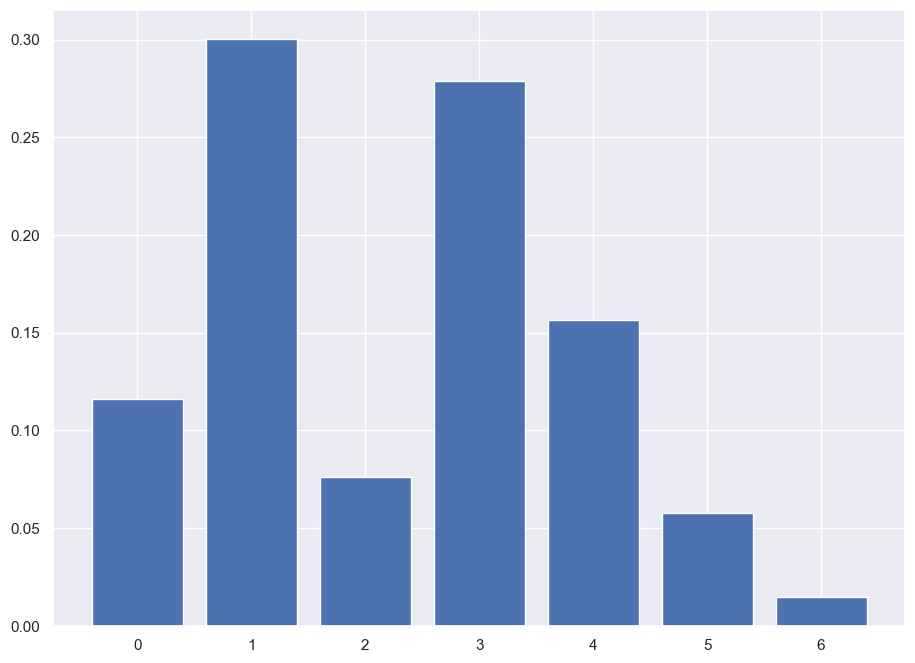

In [60]:
importance = rf_grid_search.best_estimator_.feature_importances_

for i,v in enumerate(abs(importance)):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], abs(importance))
plt.show()

In [61]:
independent_columns_names

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfDependents']

Bagging

In [72]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

parameters = {
    "max_features": [2, 3, 4],
    "max_samples": [0.5, 0.7, 0.9],
#    "base_estimator__C": [0.0001, 0.001, 0.01, 1, 10, 100],
}

In [73]:
%%time
bag = BaggingClassifier(LogisticRegression(class_weight='balanced'), n_estimators=100, n_jobs=-1, random_state=42)
bag_rv = RandomizedSearchCV(rf, parameters, n_iter=20, scoring='roc_auc', n_jobs=-1, random_state=1, cv=skf, verbose=True)
bag_rv.fit(X, y)
bag_rv.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: total: 6.62 s
Wall time: 30.1 s


0.8133906243396407

In [74]:
bag_rv.best_params_

{'max_samples': 0.5, 'max_features': 3}